# IQR Outliers

In [38]:
import pickle
with open('cancer_diagnosis.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

In [39]:
df= loaded_data

In [40]:
df = df.rename(columns={'concave points_worst': 'concave_points_worst', 'concave points_mean': 'concave_points_mean', 'concave points_se': 'concave_points_se'})

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## outlier detection

<Figure size 54700x3200 with 0 Axes>

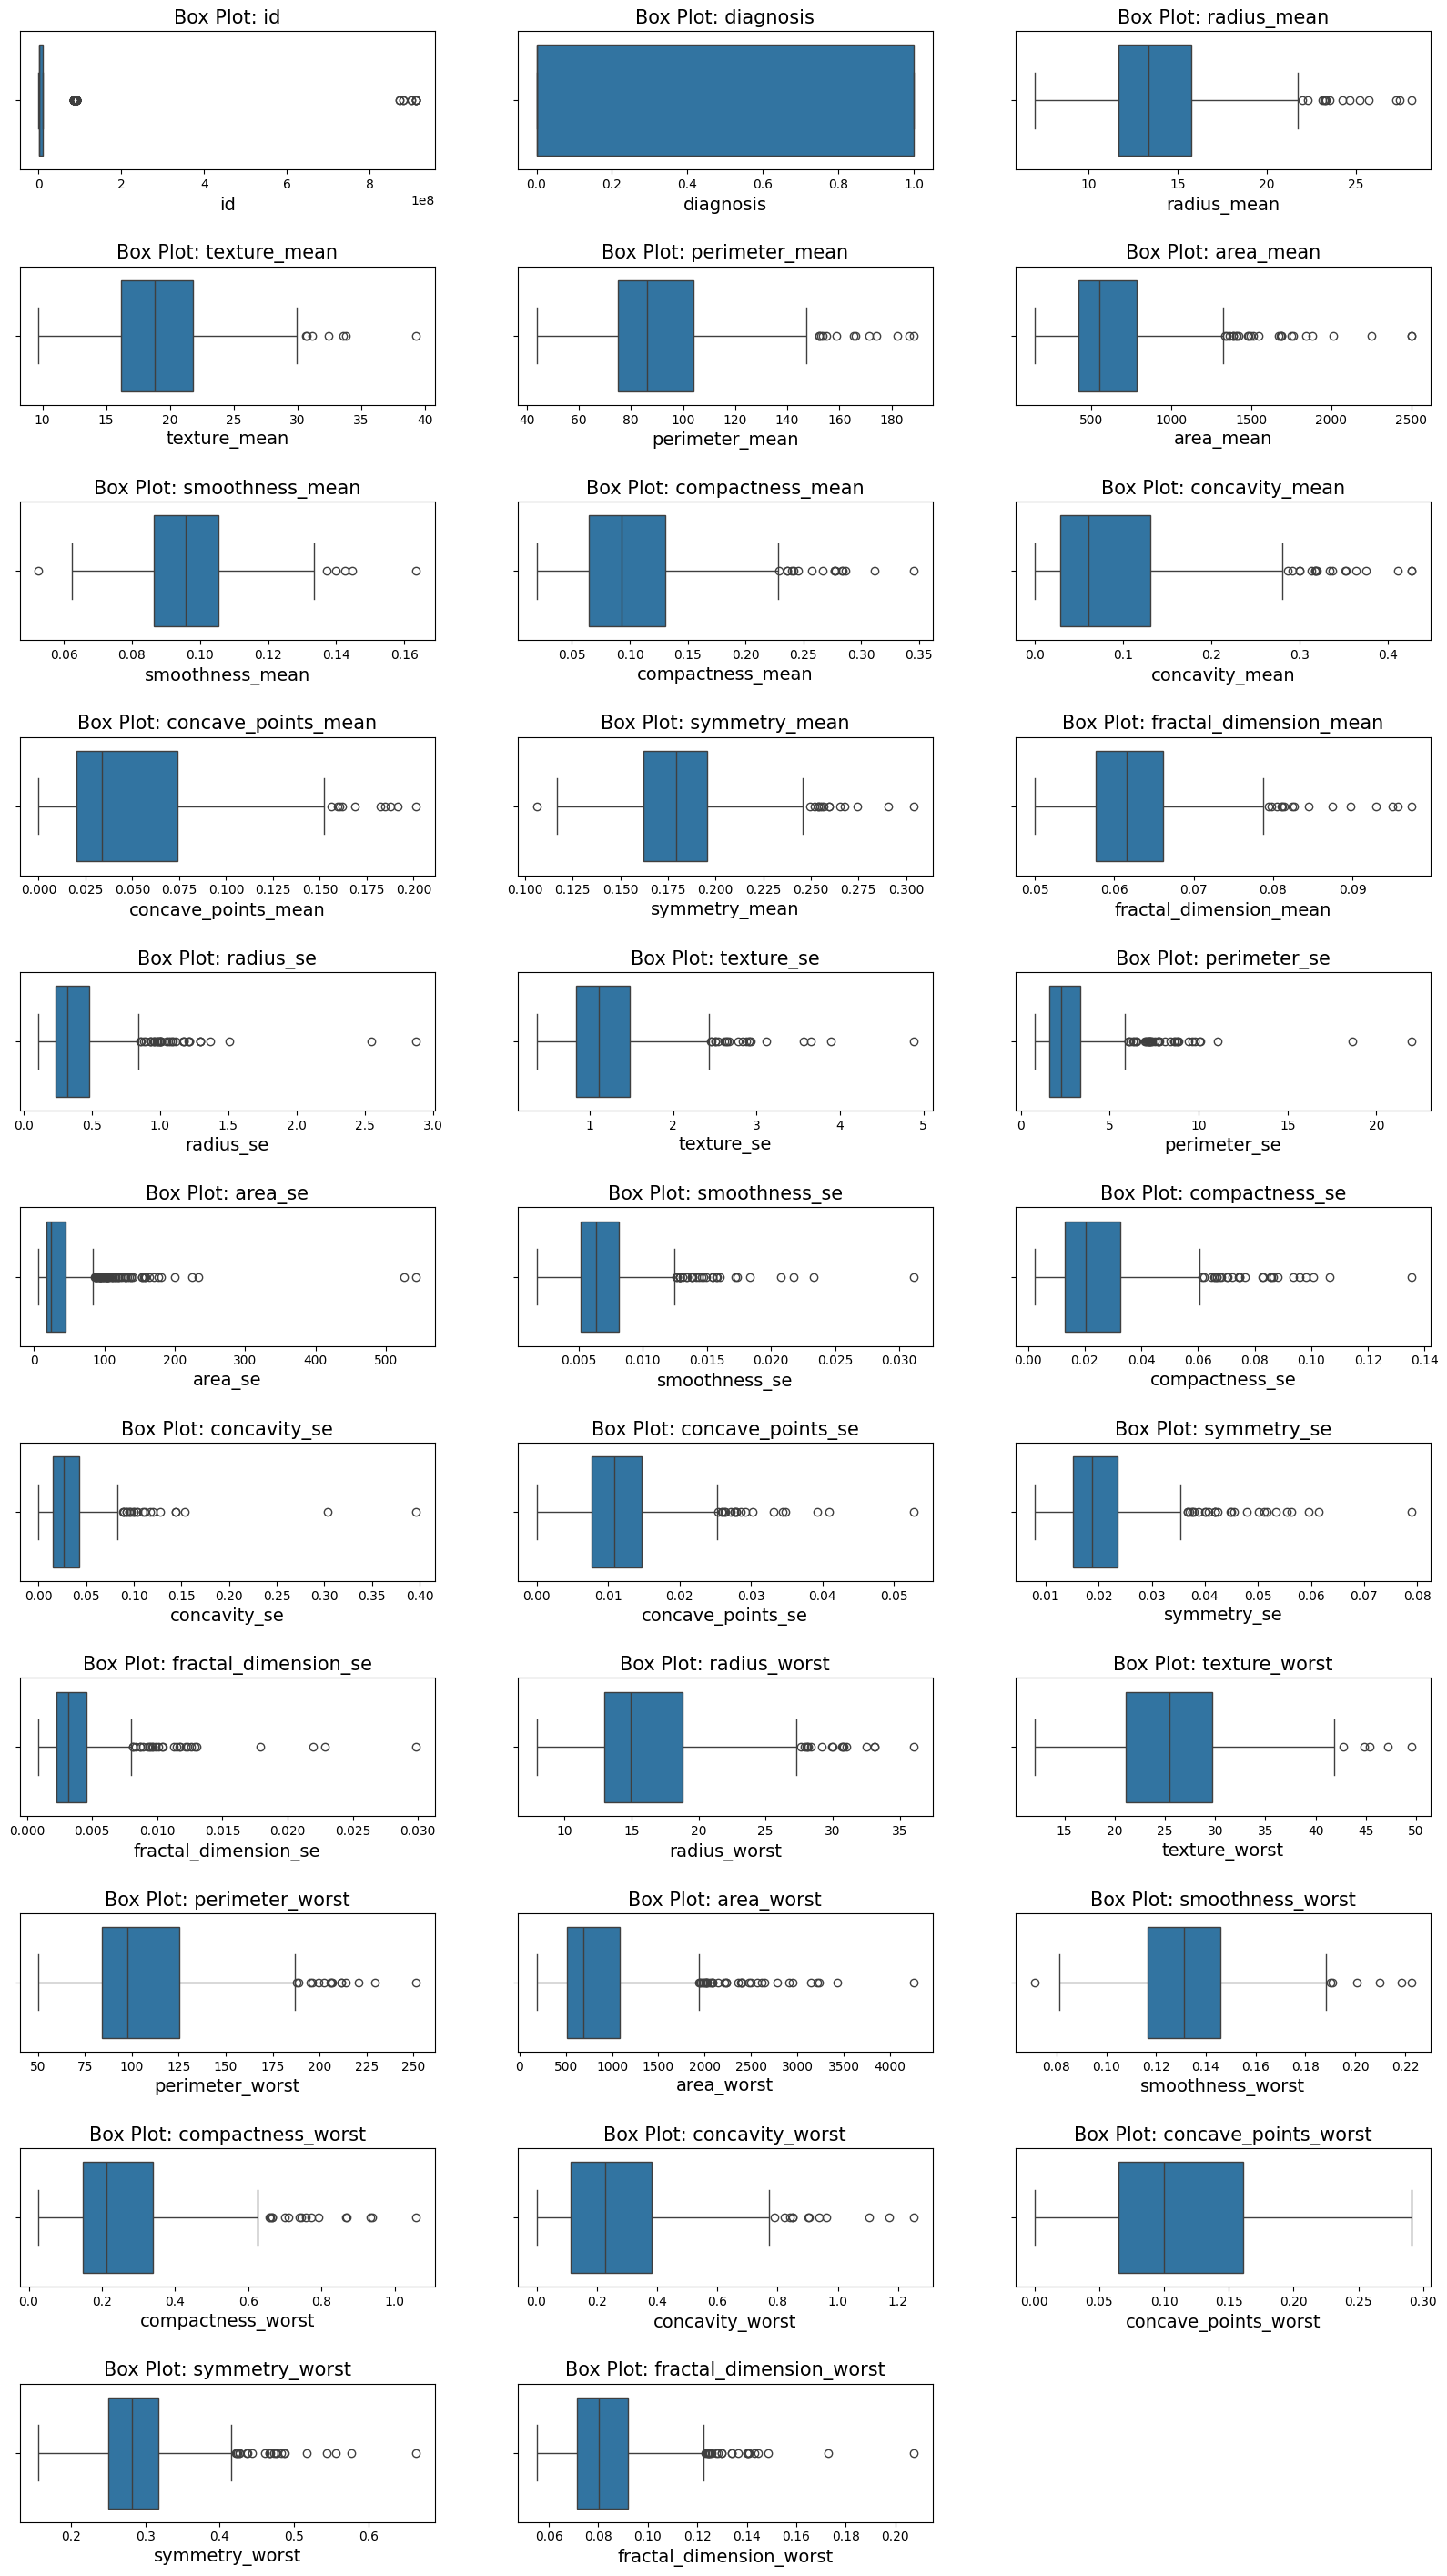

In [43]:
plt.figure(figsize=(20,200))

def outliers_boxplot(df):
    for i, col in enumerate(df.columns):
        
            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=df, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)
        
outliers_boxplot(df)
plt.show()

## columns that are skewed

In [87]:
cols=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave_points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst']
con_df_skewed=df[cols]

In [89]:
def outliers_df(df):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    for col in con_df_skewed:  
        temp = pd.DataFrame(df[col])
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR

        temp_outliers = temp[(temp[col] > upper_limit) | (temp[col] < lower_limit)]
        num_outliers = len(temp_outliers)
        total_outliers.loc[col] = [num_outliers, num_outliers / len(df) * 100]

    return total_outliers[total_outliers['Percent'] > 0]

outliers_df = outliers_df(con_df_skewed).sort_values('Percent', ascending=False)
outliers_df

,Outlier count,Percent
area_se,65.0,11.423550
radius_se,38.0,6.678383
perimeter_se,38.0,6.678383
area_worst,35.0,6.151142
smoothness_se,30.0,5.272408
fractal_dimension_se,28.0,4.920914
compactness_se,28.0,4.920914
symmetry_se,27.0,4.745167
area_mean,25.0,4.393673
fractal_dimension_worst,24.0,4.217926


In [90]:
def outliers(df):
    label_out_df = df.copy()
    for col in label_out_df:
        if col in outliers_df.index:
            Q1 = label_out_df[col].quantile(0.25)
            Q3 = label_out_df[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            label_out_df[col] = np.where(label_out_df[col] > upper_limit,'Outlier',np.where(label_out_df[col] < lower_limit,'Outlier',label_out_df[col]))
    return label_out_df
new_df_outliers = outliers(con_df_skewed)
new_df_outliers

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,...,0.01587,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier
1,Outlier,17.77,Outlier,Outlier,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.0134,0.01389,0.003532,Outlier,Outlier,Outlier,0.1866,0.2416,0.275,0.08902
2,Outlier,21.25,Outlier,Outlier,0.1599,Outlier,Outlier,0.2069,0.05999,Outlier,...,Outlier,0.0225,0.004571,Outlier,Outlier,Outlier,0.4245,0.4504,Outlier,0.08758
3,11.42,20.38,77.58,386.1,Outlier,Outlier,Outlier,Outlier,Outlier,0.4956,...,Outlier,Outlier,Outlier,14.91,98.87,567.7,Outlier,Outlier,Outlier,Outlier
4,Outlier,14.34,Outlier,Outlier,0.1328,Outlier,Outlier,0.1809,0.05883,Outlier,...,Outlier,0.01756,0.005115,Outlier,Outlier,Outlier,0.205,0.4,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,Outlier,22.39,Outlier,Outlier,0.1159,Outlier,Outlier,0.1726,0.05623,Outlier,...,Outlier,0.01114,0.004239,Outlier,Outlier,Outlier,0.2113,0.4107,Outlier,0.07115
565,Outlier,Outlier,Outlier,Outlier,0.1034,0.144,0.09791,0.1752,0.05533,Outlier,...,0.01678,0.01898,0.002498,Outlier,Outlier,Outlier,0.1922,0.3215,0.2572,0.06637
566,16.6,Outlier,108.3,858.1,0.1023,0.09251,0.05302,0.159,0.05648,0.4564,...,0.01557,0.01318,0.003892,18.98,126.7,1124.0,0.3094,0.3403,0.2218,0.0782
567,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,0.07016,Outlier,...,0.01664,0.02324,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier


In [91]:
df_outliers = new_df_outliers.isin(['Outlier']) 
df_outliers = df_outliers.astype('int')
df_outliers

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
2,1,0,1,1,0,1,1,0,0,1,...,1,0,0,1,1,1,0,0,1,0
3,0,0,0,0,1,1,1,1,1,0,...,1,1,1,0,0,0,1,1,1,1
4,1,0,1,1,0,1,1,0,0,1,...,1,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0,1,1,0,1,1,0,0,1,...,1,0,0,1,1,1,0,0,1,0
565,1,1,1,1,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,0
566,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
567,1,1,1,1,1,1,1,1,0,1,...,0,0,1,1,1,1,1,1,1,1


In [92]:
def capping(df):
    temp = df.copy()
    for col in temp:
        if col in outliers_df.index:
            Q1 = temp[col].quantile(0.25)
            Q3 = temp[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            temp[col] = np.where(temp[col] > upper_limit,np.nan,np.where(temp[col] < lower_limit,np.nan,temp[col]))
    return temp
temp = capping(con_df_skewed)
temp

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.01587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,17.77,NaN,NaN,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.01340,0.01389,0.003532,NaN,NaN,NaN,0.18660,0.2416,0.2750,0.08902
2,NaN,21.25,NaN,NaN,0.15990,NaN,NaN,0.2069,0.05999,NaN,...,NaN,0.02250,0.004571,NaN,NaN,NaN,0.42450,0.4504,NaN,0.08758
3,11.42,20.38,77.58,386.1,NaN,NaN,NaN,NaN,NaN,0.4956,...,NaN,NaN,NaN,14.91,98.87,567.7,NaN,NaN,NaN,NaN
4,NaN,14.34,NaN,NaN,0.13280,NaN,NaN,0.1809,0.05883,NaN,...,NaN,0.01756,0.005115,NaN,NaN,NaN,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,NaN,22.39,NaN,NaN,0.11590,NaN,NaN,0.1726,0.05623,NaN,...,NaN,0.01114,0.004239,NaN,NaN,NaN,0.21130,0.4107,NaN,0.07115
565,NaN,NaN,NaN,NaN,0.10340,0.14400,0.09791,0.1752,0.05533,NaN,...,0.01678,0.01898,0.002498,NaN,NaN,NaN,0.19220,0.3215,0.2572,0.06637
566,16.60,NaN,108.30,858.1,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,0.01557,0.01318,0.003892,18.98,126.70,1124.0,0.30940,0.3403,0.2218,0.07820
567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07016,NaN,...,0.01664,0.02324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
def cocor(x1,y1, x2,y2):
    xy1 = x1.corr(y1, method='spearman')
    xy2 = x2.corr(y2, method='spearman')
    n1 = len(x1)
    n2 = len(x2)
    xy_z = 0.5 * np.log((1 + xy1)/(1 - xy1))
    ab_z = 0.5 * np.log((1 + xy2)/(1 - xy2))
    if n2 is None:
        n2 = n1
    se_diff_r = np.sqrt(1/(n1 - 3) + 1/(n2 - 3))
    diff = xy_z - ab_z
    z = abs(diff / se_diff_r)
    p = (1 - norm.cdf(z)) * 2
    return z, p

In [94]:
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp, pearsonr

c = con_df_skewed
names = c.columns

out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])

no_outliers = con_df_skewed.copy()

np.seterr(divide='ignore', invalid='ignore')

rows = []

for i in names:

    out = c[i]

    non = c[i].loc[df_outliers[i] == 0]

    diagnosis_out = df['diagnosis']
    diagnosis_non = df['diagnosis'].loc[df_outliers[i] == 0]

    pvalue_out = pearsonr(out, diagnosis_out)[1]
    pvalue_non = pearsonr(non, diagnosis_non)[1]
    cor_change = np.where(pvalue_out < 0.05, '+', '-')

    mv = df_outliers[i].sum()

    pval = ks_2samp(out, non)[1]
    dist_change = np.where(pval < 0.05, '+', '-')

    rows.append({
        'feature': i,
        'outliers_cnt': mv,
        'distribution_changed': dist_change,
        'correlation_changed': cor_change
    })

out_df = pd.DataFrame(rows)

out_df

,feature,outliers_cnt,distribution_changed,correlation_changed
0,radius_mean,129,+,+
1,texture_mean,104,+,+
2,perimeter_mean,121,+,+
3,area_mean,114,+,+
4,compactness_mean,83,+,+
5,concavity_mean,74,+,+
6,concave_points_mean,57,+,+
7,symmetry_mean,102,+,+
8,fractal_dimension_mean,98,+,-
9,radius_se,91,+,+


In [95]:
out_df['drop']='yes'
out_df.loc[(out_df.distribution_changed=='+')& (out_df.correlation_changed=='+'),'drop'] = 'no'
out_df

,feature,outliers_cnt,distribution_changed,correlation_changed,drop
0,radius_mean,129,+,+,no
1,texture_mean,104,+,+,no
2,perimeter_mean,121,+,+,no
3,area_mean,114,+,+,no
4,compactness_mean,83,+,+,no
5,concavity_mean,74,+,+,no
6,concave_points_mean,57,+,+,no
7,symmetry_mean,102,+,+,no
8,fractal_dimension_mean,98,+,-,yes
9,radius_se,91,+,+,no


## choosing the relevant columns to drop outliers

In [97]:
relevant_columns=out_df.loc[out_df['drop']=='yes']
relevant_columns

,feature,outliers_cnt,distribution_changed,correlation_changed,drop
8,fractal_dimension_mean,98,+,-,yes
10,texture_se,99,+,-,yes
13,smoothness_se,110,+,-,yes
17,symmetry_se,96,+,-,yes
18,fractal_dimension_se,85,+,-,yes


In [98]:
relevant_columns_features=out_df.loc[out_df['drop']=='yes']['feature']
relevant_columns_features

8     fractal_dimension_mean
10                texture_se
13             smoothness_se
17               symmetry_se
18      fractal_dimension_se
Name: feature, dtype: object

## remove the outliers

In [99]:
remove_outliers=['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se']
remove_outliers

['fractal_dimension_mean',
 'texture_se',
 'smoothness_se',
 'symmetry_se',
 'fractal_dimension_se']

In [100]:
manipulated_data= df.copy()
for col in remove_outliers:
    manipulated_data.loc[df_outliers[col] == 1, col] = np.nan

In [101]:
columns_to_drop=['smoothness_mean', 'texture_worst', 'smoothness_worst', 'concave_points_worst']
dropped_manipulated_data=manipulated_data.drop(columns=columns_to_drop)
dropped_manipulated_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.27760,0.30010,0.14710,0.2419,...,0.01587,NaN,NaN,25.380,184.60,2019.0,0.66560,0.7119,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.07864,0.08690,0.07017,0.1812,...,0.01340,0.01389,0.003532,24.990,158.80,1956.0,0.18660,0.2416,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.15990,0.19740,0.12790,0.2069,...,0.02058,0.02250,0.004571,23.570,152.50,1709.0,0.42450,0.4504,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.28390,0.24140,0.10520,0.2597,...,0.01867,NaN,NaN,14.910,98.87,567.7,0.86630,0.6869,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.13280,0.19800,0.10430,0.1809,...,0.01885,0.01756,0.005115,22.540,152.20,1575.0,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11590,0.24390,0.13890,0.1726,...,0.02454,0.01114,0.004239,25.450,166.10,2027.0,0.21130,0.4107,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.10340,0.14400,0.09791,0.1752,...,0.01678,0.01898,0.002498,23.690,155.00,1731.0,0.19220,0.3215,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.10230,0.09251,0.05302,0.1590,...,0.01557,0.01318,0.003892,18.980,126.70,1124.0,0.30940,0.3403,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.27700,0.35140,0.15200,0.2397,...,0.01664,0.02324,NaN,25.740,184.60,1821.0,0.86810,0.9387,0.4087,0.12400


In [102]:
dropped_manipulated_data.loc[df['fractal_dimension_se'] == 'yes']

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst


In [105]:
df_cleaned=dropped_manipulated_data
df_cleaned.to_pickle('df_cleaned.pkl')

## merge th guassian outliers results with the IQR results

In [106]:
with open('con_df_filtered.pkl', 'rb') as file:
    con_df_filtered = pickle.load(file)

In [107]:
merged_df = pd.merge(df_cleaned, con_df_filtered, how='right', left_index=True, right_index=True)


In [108]:
merged_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,perimeter_worst,area_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,smoothness_mean,texture_worst,smoothness_worst,concave_points_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.27760,0.30010,0.14710,0.2419,...,184.6,2019.0,0.6656,0.7119,0.4601,0.11890,0.11840,17.33,0.1622,0.2654
1,842517,1,20.57,17.77,132.90,1326.0,0.07864,0.08690,0.07017,0.1812,...,158.8,1956.0,0.1866,0.2416,0.2750,0.08902,0.08474,23.41,0.1238,0.1860
2,84300903,1,19.69,21.25,130.00,1203.0,0.15990,0.19740,0.12790,0.2069,...,152.5,1709.0,0.4245,0.4504,0.3613,0.08758,0.10960,25.53,0.1444,0.2430
4,84358402,1,20.29,14.34,135.10,1297.0,0.13280,0.19800,0.10430,0.1809,...,152.2,1575.0,0.2050,0.4000,0.2364,0.07678,0.10030,16.67,0.1374,0.1625
5,843786,1,12.45,15.70,82.57,477.1,0.17000,0.15780,0.08089,0.2087,...,103.4,741.6,0.5249,0.5355,0.3985,0.12440,0.12780,23.75,0.1791,0.1741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,1,20.92,25.09,143.00,1347.0,0.22360,0.31740,0.14740,0.2149,...,179.1,1819.0,0.4186,0.6599,0.2929,0.09873,0.10990,29.41,0.1407,0.2542
564,926424,1,21.56,22.39,142.00,1479.0,0.11590,0.24390,0.13890,0.1726,...,166.1,2027.0,0.2113,0.4107,0.2060,0.07115,0.11100,26.40,0.1410,0.2216
565,926682,1,20.13,28.25,131.20,1261.0,0.10340,0.14400,0.09791,0.1752,...,155.0,1731.0,0.1922,0.3215,0.2572,0.06637,0.09780,38.25,0.1166,0.1628
566,926954,1,16.60,28.08,108.30,858.1,0.10230,0.09251,0.05302,0.1590,...,126.7,1124.0,0.3094,0.3403,0.2218,0.07820,0.08455,34.12,0.1139,0.1418


In [109]:
merged_df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean      86
radius_se                    0
texture_se                  95
perimeter_se                 0
area_se                      0
smoothness_se              104
compactness_se               0
concavity_se                 0
concave_points_se            0
symmetry_se                 89
fractal_dimension_se        77
radius_worst                 0
perimeter_worst              0
area_worst                   0
compactness_worst            0
concavity_worst              0
symmetry_worst               0
fractal_dimension_worst      0
smoothness_mean              0
texture_worst                0
smoothness_worst             0
concave_points_worst         0
dtype: i

In [110]:
merged_df.to_pickle('merged_df.pkl')

In [111]:
merged_df.to_excel('merged_df.xlsx', index=False)